In [1]:
# Load the autoreload extension
%load_ext autoreload

# Automatically reload modules before executing code
%autoreload 2

# Predictive ML Plots

In [2]:
from pathlib import Path
from benchmark_src.results_processing import create_plots, view_predml_plots
from benchmark_src.results_processing.plots import predML_plots
from benchmark_src.results_processing.plots.plot_utils import get_task_df, get_list_of_all_runs
from benchmark_src.results_processing import ranking   



In [3]:
# Create folders for the plots
overall_results_folder = Path("../../results")
assert overall_results_folder.exists(), f"Could not find results folder at {overall_results_folder}"

predML_plots_folder = overall_results_folder / "plots" / "predictive_ml"
predML_plots_folder.mkdir(exist_ok=True)

mlp_plots_folder = predML_plots_folder / "MLP_model"
mlp_plots_folder.mkdir(exist_ok=True)
xgboost_plots_folder = predML_plots_folder / "XGBoost_model"
xgboost_plots_folder.mkdir(exist_ok=True)

In [4]:
# get only the predictiveML results
task_df = get_task_df(results_folder=overall_results_folder, task_name="predictive_ml")
task_df = create_plots.predictive_ml_add_task_type(task_df)

Unique datasets (predictive_ml): 51


In [5]:
#task_df.style

## Configure which approaches to include

In [6]:
# get list as ouptput and copy it to the next cell to comment out approaches not to be plotted
get_list_of_all_runs(task_df)

include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B,table_row_limit=100'),
    ('baseline', 'baseline'),
    ('hytrel', 'hytrel'),
    ('sap_rpt_oss', 'bagging=1,max_context_size=2048,predML_based_on=custom_predictiveML_model'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
    ('tabicl', 'n_estimators=32,predML_based_on=custom_predictiveML_model'),
    ('tabicl', 'n_estimators=32,predML_based_on=row_embeddings'),
    ('tabpfn', 'device=cuda,predML_based_on=custom_predictiveML_model'),
    ('tabpfn', 'device=cuda,predML_based_on=row_embeddings'),
    ('tabula_8b', 'batch_size=1,device=cuda,max_length=512,model_name=mlfoundatio

In [7]:
include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B,table_row_limit=100'),
    ('baseline', 'baseline'),
    ('hytrel', 'hytrel'),
    ('sap_rpt_oss', 'bagging=1,max_context_size=2048,predML_based_on=custom_predictiveML_model'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
    ('tabicl', 'n_estimators=32,predML_based_on=custom_predictiveML_model'),
    ('tabicl', 'n_estimators=32,predML_based_on=row_embeddings'),
    ('tabpfn', 'device=cuda,predML_based_on=custom_predictiveML_model'),
    ('tabpfn', 'device=cuda,predML_based_on=row_embeddings'),
    ('tabula_8b', 'batch_size=1,device=cuda,max_length=512,model_name=mlfoundations_tabula-8b,n_few_shot_examples=10,predML_based_on=row_embeddings'),
]

In [8]:
# Use the list to filter the original task_df
filtered_task_df = task_df[
    task_df.set_index(['Approach', 'Configuration']).index.isin(include_runs)
]

In [9]:
task_type_groups = filtered_task_df.groupby(["task_type"])

## Overview over the results -> num datasets per approach we have results for

In [10]:
# overview
filtered_task_df.groupby(['task', 'Approach', 'Configuration'])['dataset'].nunique().reset_index(name='num_datasets')

,task,Approach,Configuration,num_datasets
0,predictive_ml,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",51
1,predictive_ml,baseline,baseline,51
2,predictive_ml,hytrel,hytrel,40
3,predictive_ml,sap_rpt_oss,"bagging=1,max_context_size=2048,predML_based_o...",51
4,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",51
5,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_lim...",51
6,predictive_ml,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,51
7,predictive_ml,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,51
8,predictive_ml,tabicl,"n_estimators=32,predML_based_on=custom_predict...",38
9,predictive_ml,tabicl,"n_estimators=32,predML_based_on=row_embeddings",38


## Results averaged over the datasets

In [11]:
model_to_folder = {
    "XGBoost": xgboost_plots_folder,
    "MLP": mlp_plots_folder,
}

Unique datasets (binary): 30
Unique datasets with full results(binary): 24
############## Started binary classification barplot
############## Started binary classification barplot
Unique datasets (multiclass): 8
Unique datasets with full results(multiclass): 6
############## Started multiclass classification barplot
Unique datasets (regression): 13
Unique datasets with full results(regression): 10


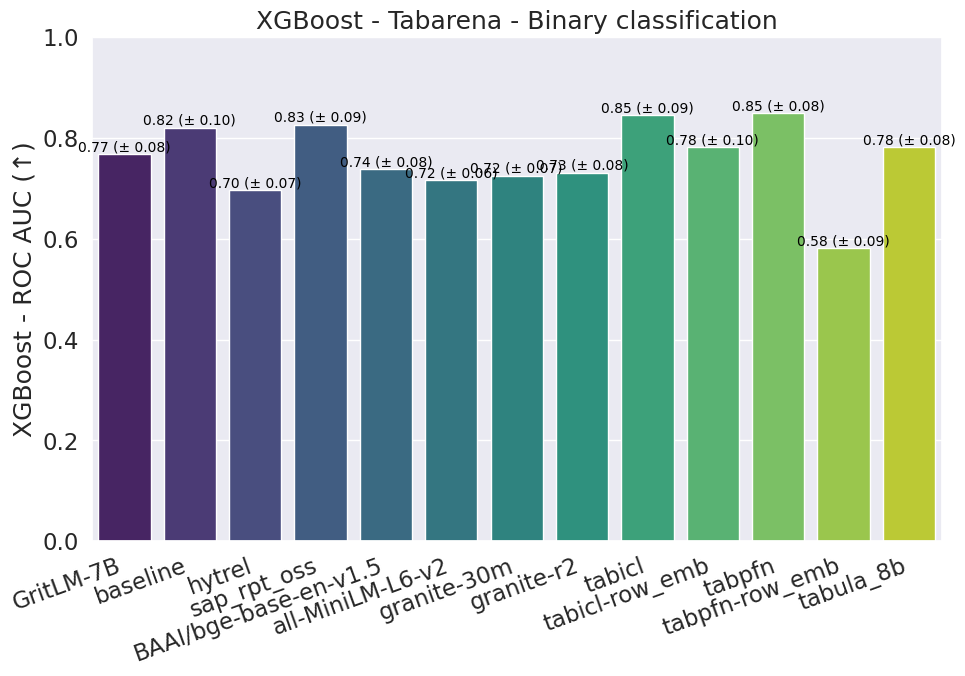

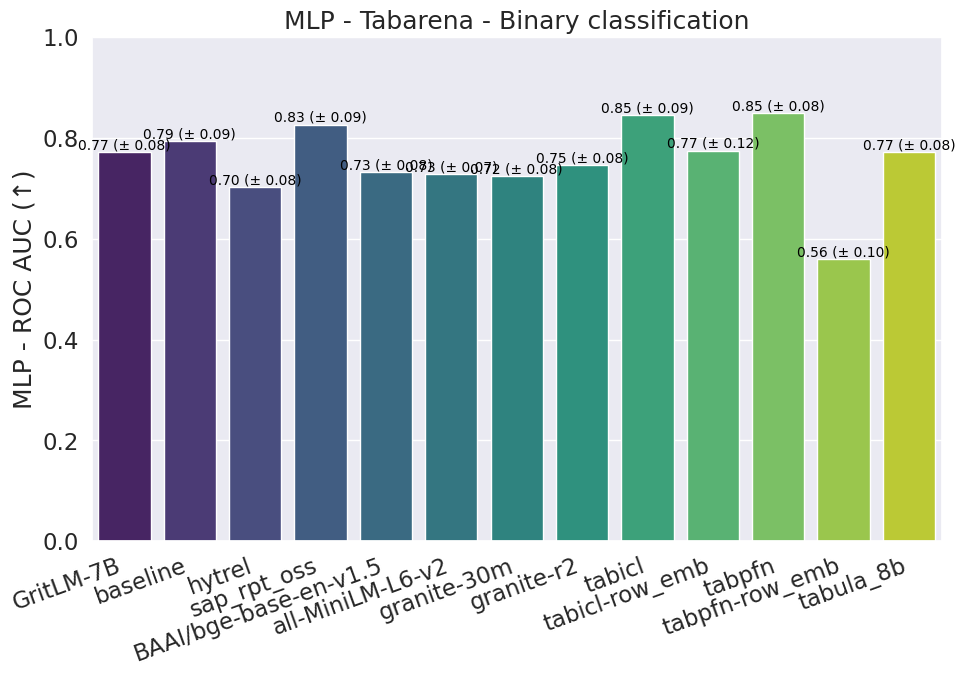

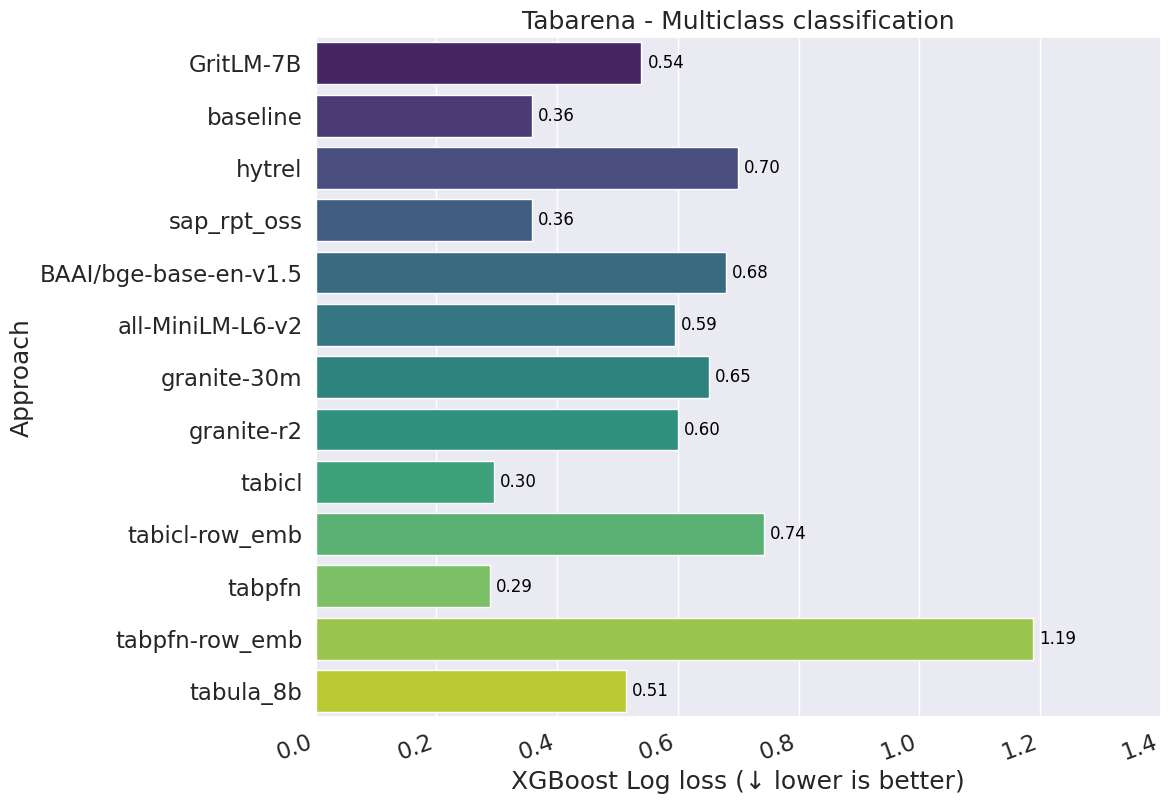

In [12]:

for task_type, task_type_df in task_type_groups:
    task_type_df = task_type_df.dropna(axis=1, how="all")
    task_type = task_type[0]

    # only keep results for datasets where all approaches have results
    complete_results_df = create_plots.filter_for_results_on_all_datasets(task_type, task_type_df)
    potentially_incomplete_results_df = task_type_df 

    ####################################################################################################
    # Create charts
    ####################################################################################################
    if task_type == "binary":
        results_column = 'XGBoost_roc_auc_score (↑)_mean'
        title = "Tabarena Binary Classification: Time Taken vs. Performance Reached"

        for model_name in ["XGBoost", "MLP"]:
            results_folder = model_to_folder[model_name]
            predML_plots.create_binary_barplot(df=complete_results_df, results_folder=results_folder, model_name=model_name)
            for plot_percentage in [True, False]:
                predML_plots.create_binary_barplot_altair(df=complete_results_df, 
                                                          results_folder=results_folder, 
                                                          model_name=model_name, 
                                                          aggregated=True, 
                                                          dataset_name="aggregated", 
                                                          plot_percentage_to_baseline=plot_percentage)

        # create barplots per dataset
        unique_datasets = potentially_incomplete_results_df['dataset'].unique()

        for dataset_name in unique_datasets:
            # Filter data for the current dataset
            dataset_df = potentially_incomplete_results_df[potentially_incomplete_results_df['dataset'] == dataset_name].copy()
            # drop columns with all nans (result metrics from other tasks will be nan)
            dataset_df = dataset_df.dropna(axis=1, how="all")

            for model_name in ["XGBoost", "MLP"]:
                results_folder = model_to_folder[model_name]
                for plot_percentage in [True, False]:
                    predML_plots.create_binary_barplot_altair(df=dataset_df, 
                                                            results_folder=results_folder, 
                                                            model_name=model_name, 
                                                            aggregated=False, 
                                                            dataset_name=dataset_name, 
                                                            plot_percentage_to_baseline=plot_percentage)



            
    elif task_type == "multiclass":
        results_column = 'XGBoost_log_loss (↓)_mean'
        title = "Tabarena Multiclass Classification: Time Taken vs. Performance Reached"

        predML_plots.create_multiclass_barplot(df=complete_results_df, results_folder=predML_plots_folder)

    elif task_type == "regression":
        pass
        # TODO: need to fix plotting, something is off with the names
        # current_df = complete_results_df.loc[complete_results_df['Approach'] != "tabicl"] # tabicl does not support regression
        # results_column = 'XGBoost_rmse (↓)_mean'
        # title = "Tabarena Regression: Time Taken vs. Performance Reached"

        # predML_plots.create_regression_barplot(df=current_df, results_folder=predML_plots_folder)

    else:
        raise ValueError(f"Task type unkown: {task_type}")


In [13]:
view_predml_plots.create_predml_plots_html_view(overall_results_folder)

Created ../../results/plots/predictive_ml/MLP_model/all_plots_mlp.html with 63 plots!
Created ../../results/plots/predictive_ml/XGBoost_model/all_plots_xgboost.html with 63 plots!
Created ../../results/plots/predictive_ml/all_plots_mlp_xgboost_comparison.html with 62 plots!


## Average rank and num best datasets

### For Binary Classification 

In [14]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='XGBoost_roc_auc_score (↑)_mean')
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
10,predictive_ml,tabpfn,"device=cuda,predML_based_on=custom_predictiveML_model",17,17,"['Bank_Customer_Churn', 'Bioresponse', 'Diabetes130US', 'Fitness_Club', 'Marketing_Campaign', 'bank-marketing', 'blood-transfusion-service-center', 'churn', 'coil2000_insurance_policies', 'credit_card_clients_default', 'diabetes', 'heloc', 'in_vehicle_coupon_recommendation', 'kddcup09_appetency', 'polish_companies_bankruptcy', 'seismic-bumps', 'taiwanese_bankruptcy_prediction']",1.370370
8,predictive_ml,tabicl,"n_estimators=32,predML_based_on=custom_predictiveML_model",10,10,"['APSFailure', 'Amazon_employee_access', 'GiveMeSomeCredit', 'HR_Analytics_Job_Change_of_Data_Scientists', 'NATICUSdroid', 'customer_satisfaction_in_airline', 'hazelnut-spread-contaminant-detection', 'jm1', 'online_shoppers_intention', 'qsar-biodeg']",1.866667
3,predictive_ml,sap_rpt_oss,"bagging=1,max_context_size=2048,predML_based_on=custom_predictiveML_model",3,3,"['E-CommereShippingData', 'Is-this-a-good-customer', 'credit-g']",3.566667
1,predictive_ml,baseline,baseline,0,0,[],4.033333
12,predictive_ml,tabula_8b,"batch_size=1,device=cuda,max_length=512,model_name=mlfoundations_tabula-8b,n_few_shot_examples=10,predML_based_on=row_embeddings",0,0,[],5.600000
0,predictive_ml,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",0,0,[],6.833333
9,predictive_ml,tabicl,"n_estimators=32,predML_based_on=row_embeddings",0,0,[],7.133333
4,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0,0,[],8.566667
7,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0,0,[],8.733333
5,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],9.300000


### For Multiclass classification

In [15]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='XGBoost_log_loss (↓)_mean', ascending=True)
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
8,predictive_ml,tabicl,"n_estimators=32,predML_based_on=custom_predictiveML_model",4,4,"['SDSS17', 'hiva_agnostic', 'maternal_health_risk', 'website_phishing']",2.250000
10,predictive_ml,tabpfn,"device=cuda,predML_based_on=custom_predictiveML_model",2,2,"['splice', 'students_dropout_and_academic_success']",2.428571
1,predictive_ml,baseline,baseline,0,0,[],4.125000
3,predictive_ml,sap_rpt_oss,"bagging=1,max_context_size=2048,predML_based_on=custom_predictiveML_model",2,2,"['MIC', 'anneal']",4.250000
0,predictive_ml,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",0,0,[],6.250000
12,predictive_ml,tabula_8b,"batch_size=1,device=cuda,max_length=512,model_name=mlfoundations_tabula-8b,n_few_shot_examples=10,predML_based_on=row_embeddings",0,0,[],6.500000
5,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],7.875000
6,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",0,0,[],8.125000
9,predictive_ml,tabicl,"n_estimators=32,predML_based_on=row_embeddings",0,0,[],8.375000
7,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0,0,[],8.750000


### For regression

In [16]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='XGBoost_rmse (↓)_mean', ascending=True)
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
10,predictive_ml,tabpfn,"device=cuda,predML_based_on=custom_predictiveML_model",12,12,"['Another-Dataset-on-used-Fiat-500', 'Food_Delivery_Time', 'QSAR-TID-11', 'airfoil_self_noise', 'concrete_compressive_strength', 'diamonds', 'healthcare_insurance_expenses', 'houses', 'miami_housing', 'physiochemical_protein', 'superconductivity', 'wine_quality']",1.076923
3,predictive_ml,sap_rpt_oss,"bagging=1,max_context_size=2048,predML_based_on=custom_predictiveML_model",1,1,['QSAR_fish_toxicity'],2.307692
1,predictive_ml,baseline,baseline,0,0,[],2.615385
12,predictive_ml,tabula_8b,"batch_size=1,device=cuda,max_length=512,model_name=mlfoundations_tabula-8b,n_few_shot_examples=10,predML_based_on=row_embeddings",0,0,[],4.615385
0,predictive_ml,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",0,0,[],4.846154
7,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0,0,[],7.153846
4,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0,0,[],7.307692
6,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",0,0,[],7.615385
5,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],8.000000
2,predictive_ml,hytrel,hytrel,0,0,[],9.300000


## ELO Scores

In [17]:
task_metrics_map = ranking.build_task_metrics_map(filtered_task_df)
print("Task metrics map (scores the elo metrics are based on):", task_metrics_map)

elo_df = ranking.get_elo_scores_for_task("predictive_ml", filtered_task_df, task_metrics_map)
# if dataframe not empty
if not elo_df.empty:
    elo_df = elo_df.sort_values(by='elo_score_task', ascending=False)
    elo_df.style
else:
    print("Elo dataframe is empty.")

Task metrics map (scores the elo metrics are based on): {'predictive_ml': [('LinearRegression_rmse (↓)_mean', False), ('XGBoost_roc_auc_score (↑)_mean', True), ('XGBoost_log_loss (↓)_mean', False)]}
Computing ELO for task predictive_ml using metrics: [('LinearRegression_rmse (↓)_mean', False), ('XGBoost_roc_auc_score (↑)_mean', True), ('XGBoost_log_loss (↓)_mean', False)]


In [18]:
elo_df.style

,task,Approach,Configuration,elo_score_task,num_comparisons_task
10,predictive_ml,tabpfn,"device=cuda,predML_based_on=custom_predictiveML_model",1632.077260,531
8,predictive_ml,tabicl,"n_estimators=32,predML_based_on=custom_predictiveML_model",1623.707344,440
3,predictive_ml,sap_rpt_oss,"bagging=1,max_context_size=2048,predML_based_on=custom_predictiveML_model",1583.234708,567
1,predictive_ml,baseline,baseline,1553.524779,567
12,predictive_ml,tabula_8b,"batch_size=1,device=cuda,max_length=512,model_name=mlfoundations_tabula-8b,n_few_shot_examples=10,predML_based_on=row_embeddings",1525.298953,567
0,predictive_ml,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",1511.530650,567
9,predictive_ml,tabicl,"n_estimators=32,predML_based_on=row_embeddings",1483.864256,440
7,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",1459.813465,567
4,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",1456.511987,567
5,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",1450.816514,567


### ELO Scores who beats whom?

In [19]:
pairwise_df = ranking.compute_pairwise_wins(filtered_task_df, metric_col='XGBoost_roc_auc_score (↑)_mean')
#pairwise_df.style